## Research question

### Does the quality of family relationships, parents' cohabitation status have an impact on alcohol consumption?

selected columns::
[['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']]

# Best Classifiers

## XGBoost
### Train Acc= 0.9417040358744395
### Test Acc= 0.7081339712918661

## Random Forest
### Train Acc= 0.952914798206278
### Test Acc= 0.7511961722488039

## Soft Voting
### Test Acc= 0.7679372197309418
### Train Acc= 0.6602870813397129

## KNN(k=6)
### Train Acc= 0.743274
### Test Acc= 0.655502

## Out of Bag on DecisionTree
### Train Accuracy 0.952914798206278
### Test Accuracy 0.7416267942583732
### OOB Score 0.7982062780269058

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import scikitplot as skplt



from sklearn import set_config
#set_config(transform_output = "pandas")

## Function to save figures

In [2]:
from pathlib import Path
IMAGES_PATH = Path() / "images/question 3"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Import train and test sets
X_train = pd.read_csv('smoteTrainSet.csv')
X_test = pd.read_csv('ScaledTestSet.csv')

In [4]:
X_train.columns

Index(['sex_F', 'sex_M', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A',
       'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'higher_no', 'higher_yes', 'romantic_no',
       'romantic_yes', 'age', 'Medu', 'Fedu', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'G1', 'G2', 'G3',
       'alc'],
      dtype='object')

In [5]:
X_train.shape

(892, 45)

In [6]:
# Separate target from dataset
y_train = X_train['alc']
X_train = X_train.drop(columns = ['alc'])
##X_train = X_train[['famsize_GT3', 'Pstatus_A', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_yes', 'Medu', 'Fedu', 'famrel']] 
#[['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']] 
y_test = X_test['alc']
##X_test = X_test[['famsize_GT3', 'Pstatus_A', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_yes', 'Medu', 'Fedu', 'famrel']] 
X_test = X_test.drop(columns = 'alc')

In [7]:
y_train.value_counts()

1.0    446
0.0    446
Name: alc, dtype: int64

## 0R classifier

In [8]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent")



In [9]:
dummy.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [10]:
from sklearn.metrics import accuracy_score
print('Train Accuracy', accuracy_score(y_train, dummy.predict(X_train)))
print('Test Accuracy', accuracy_score(y_test, dummy.predict(X_test)))

Train Accuracy 0.5
Test Accuracy 0.6076555023923444


## Finding suitable value of k for KNN

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

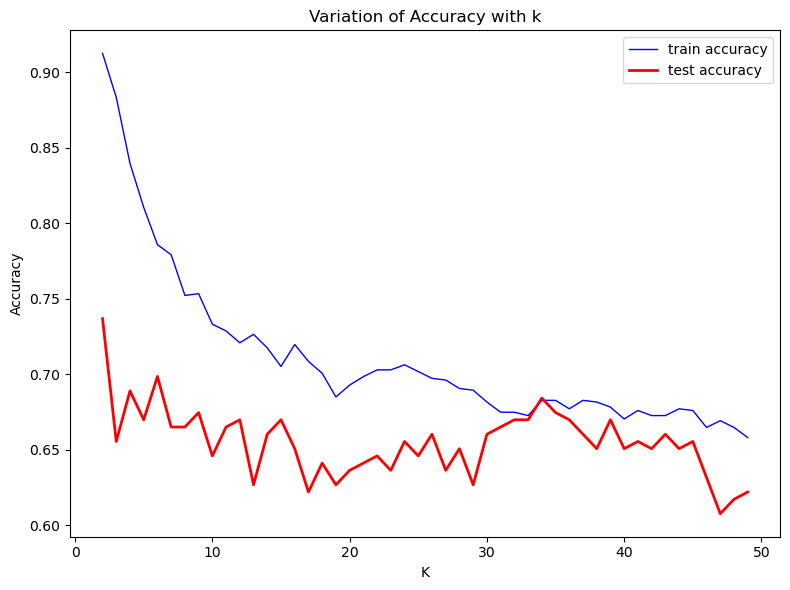

In [12]:
k = range(2, 50)
train_acc = []
test_acc = []
neighbors = []

for i in k:
    neighbors.append(i)
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

plt.figure(figsize = (8,6))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with k')
plt.plot(neighbors, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(neighbors, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against k')
plt.show();

In [13]:
pd.DataFrame({'K': neighbors, 'Train Acc': train_acc, 'Test Acc': test_acc})

K  Train Acc  Test Acc
0    2   0.912556  0.736842
1    3   0.883408  0.655502
2    4   0.839686  0.688995
3    5   0.810538  0.669856
4    6   0.785874  0.698565
5    7   0.779148  0.665072
6    8   0.752242  0.665072
7    9   0.753363  0.674641
8   10   0.733184  0.645933
9   11   0.728700  0.665072
10  12   0.720852  0.669856
11  13   0.726457  0.626794
12  14   0.717489  0.660287
13  15   0.705157  0.669856
14  16   0.719731  0.650718
15  17   0.708520  0.622010
16  18   0.700673  0.641148
17  19   0.684978  0.626794
18  20   0.692825  0.636364
19  21   0.698430  0.641148
20  22   0.702915  0.645933
21  23   0.702915  0.636364
22  24   0.706278  0.655502
23  25   0.701794  0.645933
24  26   0.697309  0.660287
25  27   0.696188  0.636364
26  28   0.690583  0.650718
27  29   0.689462  0.626794
28  30   0.681614  0.660287
29  31   0.674888  0.665072
30  32   0.674888  0.669856
31  33   0.672646  0.669856
32  34   0.682735  0.684211
33  35   0.682735  0.674641
34  36   0.677130  0.669856
35  37   0.682735  0.660287
36  38   0.681614  0.650718
37  39   0.678251  0.669856
38  40   0.670404  0.650718
39  41   0.676009  0.655502
40  42   0.672646  0.650718
41  43   0.672646  0.660287
42  44   0.677130  0.650718
43  45   0.676009  0.655502
44  46   0.664798  0.631579
45  47   0.669283  0.607656
46  48   0.664798  0.617225
47  49   0.658072  0.622010

## Applying suitable value of k in KNN Classifier

In [14]:
best_grid_knn= KNeighborsClassifier(n_neighbors=6)
best_grid_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[96 31]
 [32 50]]
Accuracy Score 0.6985645933014354
Classification report:               precision    recall  f1-score   support

         0.0       0.75      0.76      0.75       127
         1.0       0.62      0.61      0.61        82

    accuracy                           0.70       209
   macro avg       0.68      0.68      0.68       209
weighted avg       0.70      0.70      0.70       209



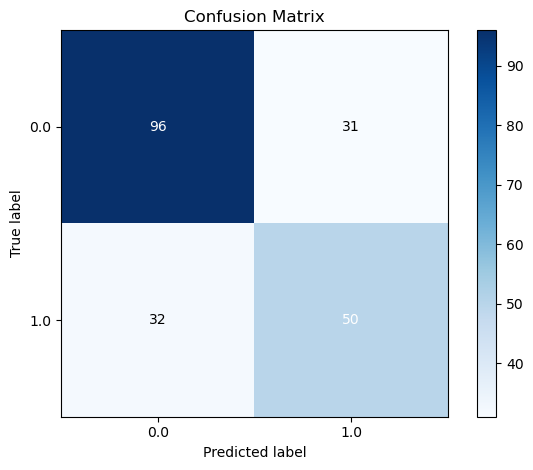

In [15]:
best_grid_knn.fit(X_train, y_train)
y_pred=best_grid_knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for KNN hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Classification Report for Train Set
Accuracy Score 0.7858744394618834
              precision    recall  f1-score   support

         0.0       0.75      0.86      0.80       446
         1.0       0.83      0.71      0.77       446

    accuracy                           0.79       892
   macro avg       0.79      0.79      0.78       892
weighted avg       0.79      0.79      0.78       892



/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

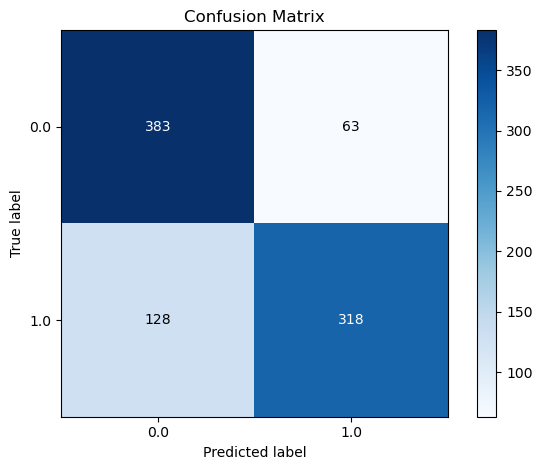

In [16]:
print("Classification Report for Train Set")
print("Accuracy Score {}".format(accuracy_score(y_train, best_grid_knn.predict(X_train).round (3))))
print(classification_report (y_train, best_grid_knn.predict(X_train)))
skplt.metrics.plot_confusion_matrix(y_train, best_grid_knn.predict(X_train));
save_fig('Train Set Confusion Matrix train for KNN hyper-para tuned q3')

## Hyperparameter Tuning on Decision Tree

In [17]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [18]:
param_grid = {
    'criterion' : ['gini'],
    'max_depth' : range(2,4),
}

In [19]:
dt_grid = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=dt_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_dt.fit(X_train,y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': range(2, 4)},
             verbose=2)

In [20]:
best_grid_dt = grid_search_dt.best_estimator_
best_grid_dt

DecisionTreeClassifier(max_depth=3)

## Appying best estimators on Decision Tree

[[106  21]
 [ 41  41]]
Accuracy Score 0.7033492822966507
Classification report: 
              precision    recall  f1-score   support

         0.0       0.72      0.83      0.77       127
         1.0       0.66      0.50      0.57        82

    accuracy                           0.70       209
   macro avg       0.69      0.67      0.67       209
weighted avg       0.70      0.70      0.69       209



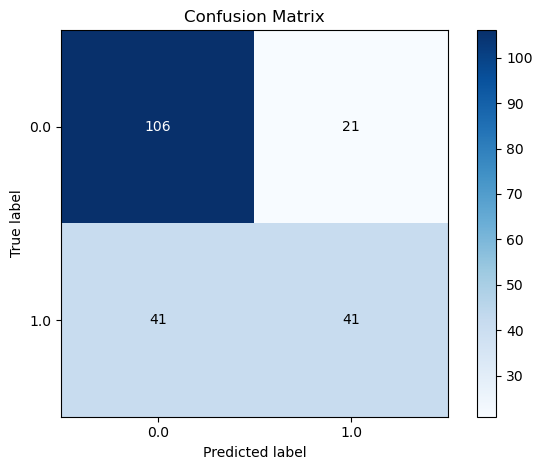

In [21]:
best_grid_dt.fit(X_train, y_train)
y_pred=best_grid_dt.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Descision_Tree hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

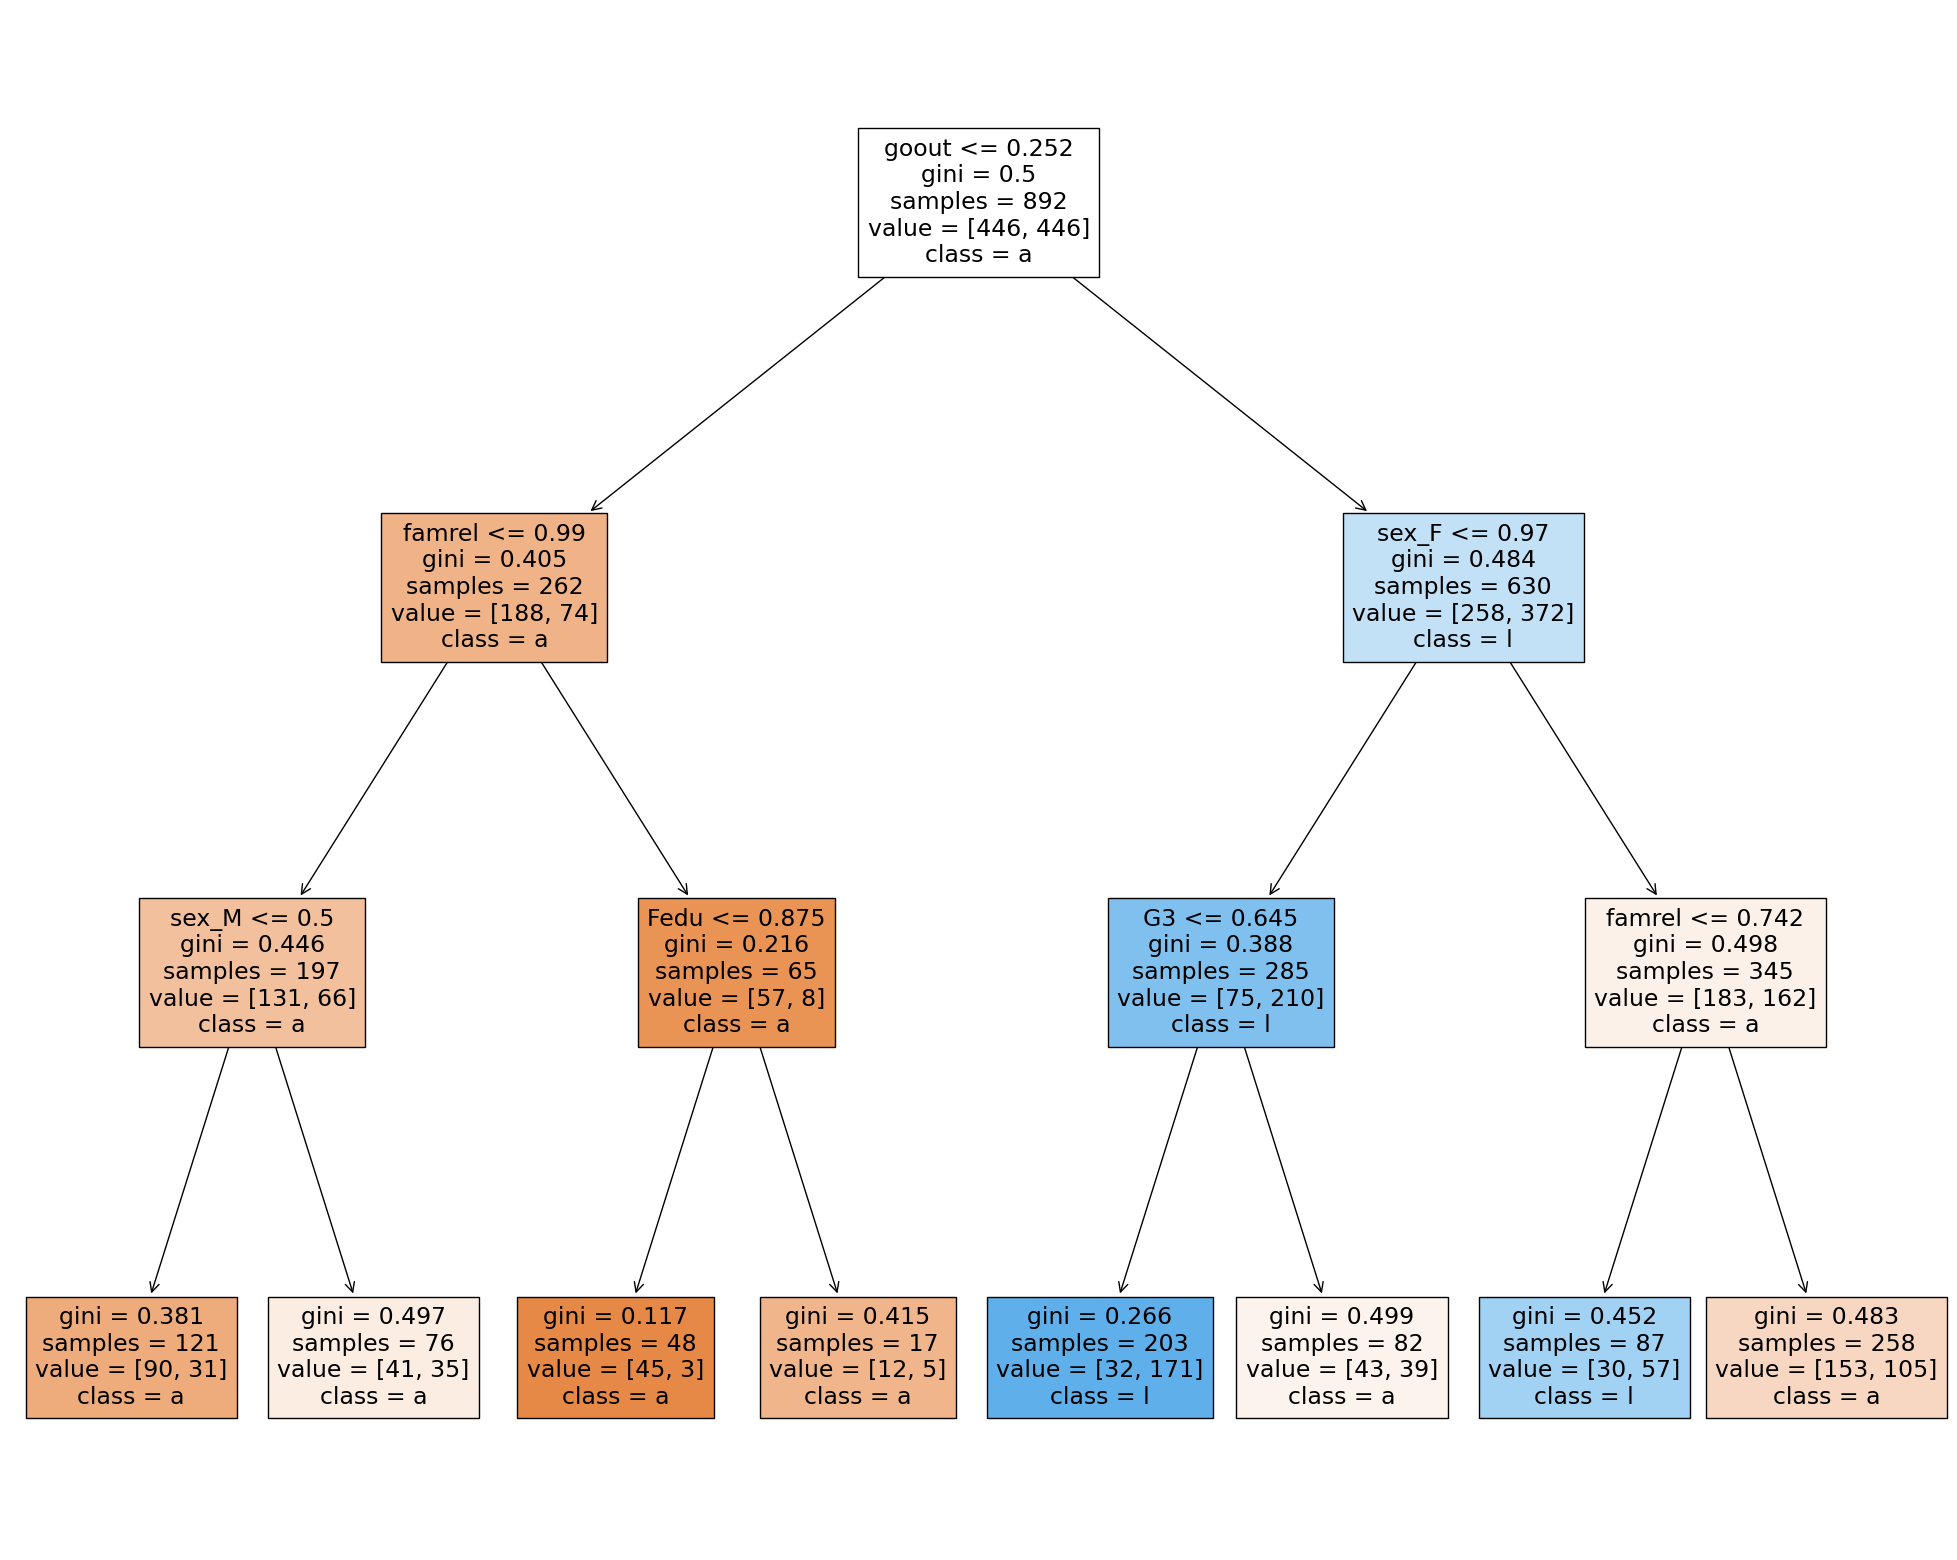

In [22]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_grid_dt, 
                   feature_names=X_train.columns.values.tolist(),  
                   class_names=y_train.name,
                   filled=True)

In [23]:
fig.savefig("decision_tree Q3.png")

Max Depth =  1 , Train Acc. =  0.628 , Test Acc. =  0.541
Max Depth =  2 , Train Acc. =  0.651 , Test Acc. =  0.703
Max Depth =  3 , Train Acc. =  0.686 , Test Acc. =  0.703
Max Depth =  4 , Train Acc. =  0.73 , Test Acc. =  0.708
Max Depth =  5 , Train Acc. =  0.771 , Test Acc. =  0.737
Max Depth =  6 , Train Acc. =  0.816 , Test Acc. =  0.742
Max Depth =  7 , Train Acc. =  0.86 , Test Acc. =  0.684
Max Depth =  8 , Train Acc. =  0.899 , Test Acc. =  0.675
Max Depth =  9 , Train Acc. =  0.936 , Test Acc. =  0.708
Max Depth =  10 , Train Acc. =  0.962 , Test Acc. =  0.732
Max Depth =  11 , Train Acc. =  0.981 , Test Acc. =  0.718
Max Depth =  12 , Train Acc. =  0.988 , Test Acc. =  0.708
Max Depth =  13 , Train Acc. =  0.993 , Test Acc. =  0.746
Max Depth =  14 , Train Acc. =  0.998 , Test Acc. =  0.751
Max Depth =  15 , Train Acc. =  0.999 , Test Acc. =  0.761
Max Depth =  16 , Train Acc. =  1.0 , Test Acc. =  0.742
Max Depth =  17 , Train Acc. =  1.0 , Test Acc. =  0.756
Max Depth = 

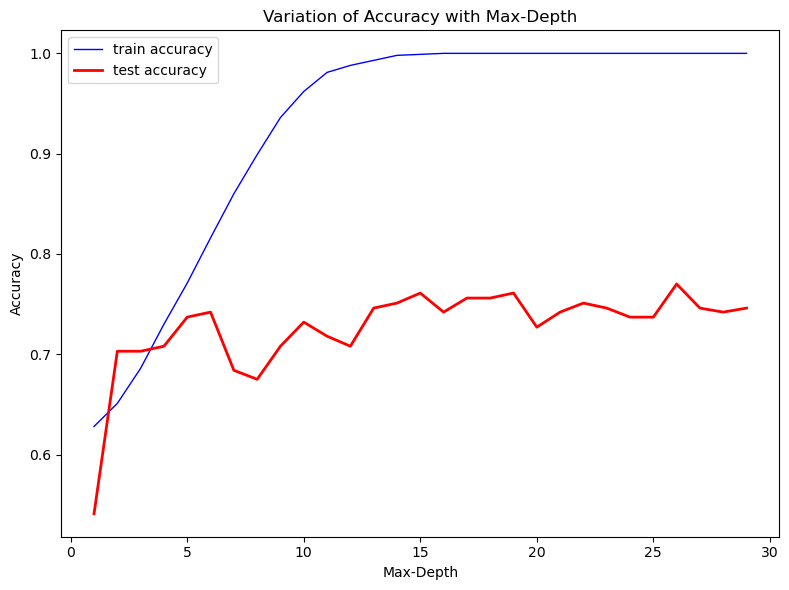

In [24]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();

In [25]:
# Confusion matrix for train set
print("Confusion Matrix for Train Set")
pd. DataFrame (confusion_matrix(y_train, best_grid_dt.predict(X_train)))


Confusion Matrix for Train Set


0    1
0  384   62
1  218  228

In [26]:
# Confusion matrix for test set
print("Confusion Matrix for Test Set")
pd. DataFrame (confusion_matrix(y_test, best_grid_dt.predict(X_test)))

Confusion Matrix for Test Set


0   1
0  106  21
1   41  41

In [27]:
print("Classification Report for Train Set")
print(classification_report (y_train, best_grid_dt.predict(X_train).round (3)))

Classification Report for Train Set
              precision    recall  f1-score   support

         0.0       0.64      0.86      0.73       446
         1.0       0.79      0.51      0.62       446

    accuracy                           0.69       892
   macro avg       0.71      0.69      0.68       892
weighted avg       0.71      0.69      0.68       892



In [28]:
print("Classification Report for Test Set")
print(classification_report(y_test, best_grid_dt.predict (X_test). round(3)))

Classification Report for Test Set
              precision    recall  f1-score   support

         0.0       0.72      0.83      0.77       127
         1.0       0.66      0.50      0.57        82

    accuracy                           0.70       209
   macro avg       0.69      0.67      0.67       209
weighted avg       0.70      0.70      0.69       209



## Hyperparameter Tuning on Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [30]:
param_grid= {
    'n_estimators': [10, 50, 100, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 30, 100],
    'max_features': [None, 'sqrt', 'log2']
}

param_grid= {
    'n_estimators': [10]
}

In [31]:
rf_grid = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
480 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/job

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 30, 100],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 500]},
             verbose=2)

In [32]:
# Finding out the best estimator
best_grid_rf = grid_search_rf.best_estimator_
best_grid_rf

RandomForestClassifier(criterion='entropy', max_depth=30, max_features=None)

## Applying best estimators in Random Forest

In [33]:
best_grid_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, max_features=None)

### Train

[[446   0]
 [  0 446]]
Accuracy Score 1.0
Classification report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       446
         1.0       1.00      1.00      1.00       446

    accuracy                           1.00       892
   macro avg       1.00      1.00      1.00       892
weighted avg       1.00      1.00      1.00       892



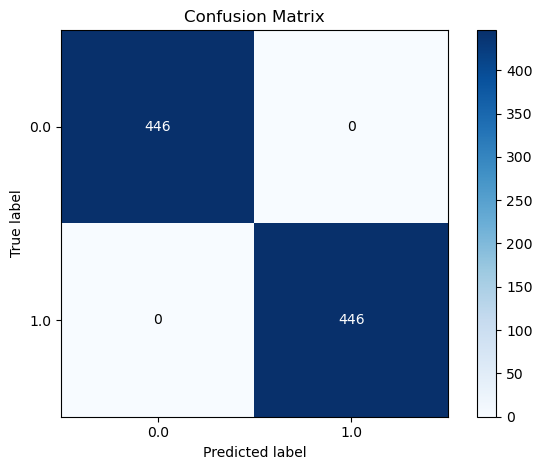

In [34]:
y_pred=best_grid_rf.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred, cmap='Blues');
save_fig('Train Set Confusion Matrix for Random Forest hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test

In [35]:
y_pred = best_grid_rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

[[113  14]
 [ 19  63]]
Accuracy Score 0.8421052631578947
Classification report: 
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       127
         1.0       0.82      0.77      0.79        82

    accuracy                           0.84       209
   macro avg       0.84      0.83      0.83       209
weighted avg       0.84      0.84      0.84       209



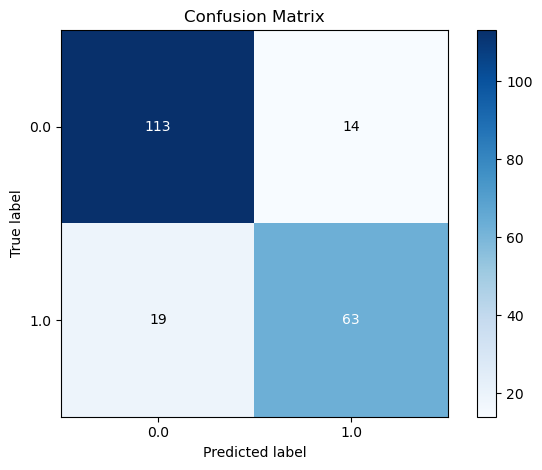

In [36]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for Random forest hyper-para tuned q3')

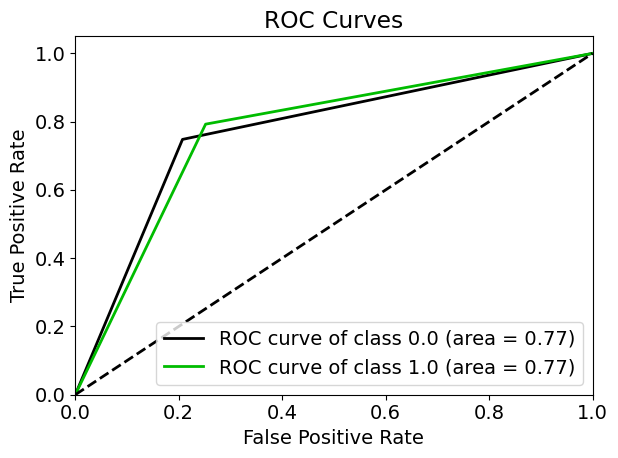

In [109]:
y_probas = DecisionTreeClassifier().fit(X_train,y_train).predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
save_fig('ROC Curve-Decisioin Tree Q2')
plt.show();

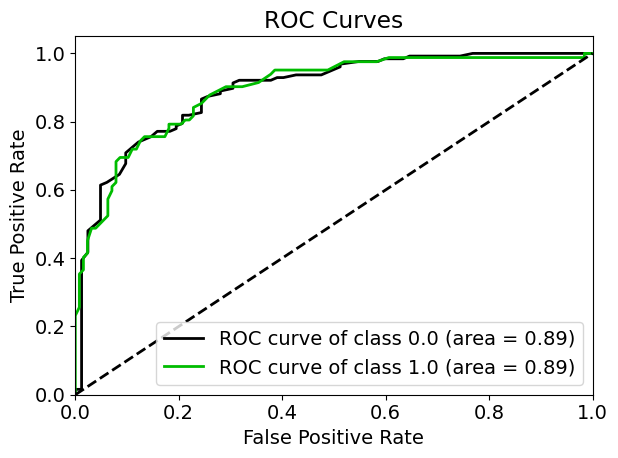

In [104]:
y_probas = best_grid_rf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
save_fig('ROC Curve-Random Forest Q3')
plt.show();

## Hyperparameter Tuning on Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'random_state' : ['42', None],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [40]:
lr_grid = LogisticRegression()
grid_search_lr = GridSearchCV(estimator=lr_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_lr.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   2.1s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   2.1s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=500; total time=   1.2s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=500; total time=   1.3s
[CV] END criterion=gini, max_depth=10, max_features=None, n_estimators=100; total 

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
410 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aymanibnehakim/opt/anaco

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'random_state': ['42', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             verbose=2)

In [41]:
best_grid_lr = grid_search_lr.best_estimator_
best_grid_lr

LogisticRegression(penalty='l1', solver='liblinear')

In [42]:
# Applying the best grid for logistic regression
best_grid_lr.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

### Train Set

[[334 112]
 [133 313]]
Accuracy Score 0.7253363228699552
Classification report: 
              precision    recall  f1-score   support

         0.0       0.72      0.75      0.73       446
         1.0       0.74      0.70      0.72       446

    accuracy                           0.73       892
   macro avg       0.73      0.73      0.73       892
weighted avg       0.73      0.73      0.73       892



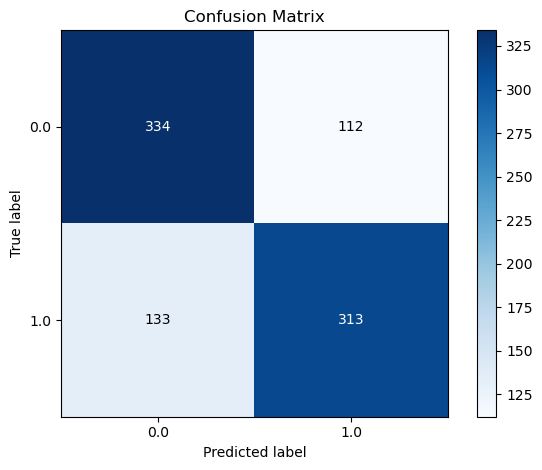

In [43]:
y_pred=best_grid_lr.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for Logistic Regression hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

[[86 41]
 [22 60]]
Accuracy Score 0.6985645933014354
Classification report: 
              precision    recall  f1-score   support

         0.0       0.80      0.68      0.73       127
         1.0       0.59      0.73      0.66        82

    accuracy                           0.70       209
   macro avg       0.70      0.70      0.69       209
weighted avg       0.72      0.70      0.70       209



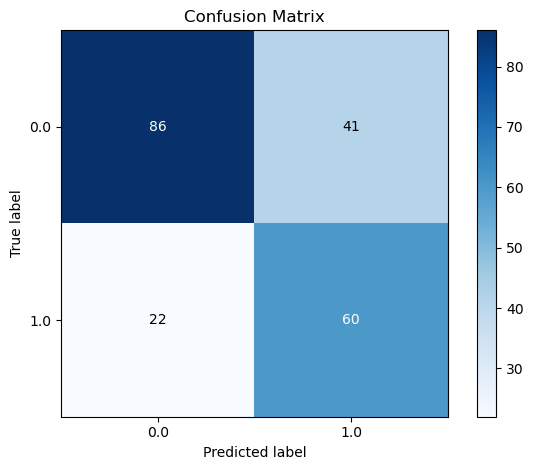

In [44]:
y_pred=best_grid_lr.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for Logistic Regression hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on SVM

In [45]:
from sklearn.svm import SVC

In [46]:
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'random_state' : [42, None],
    'gamma' : ['scale', 'auto'],
    'shrinking' : [True, False],
    'probability' : [True, False],
    'break_ties' : [True, False]
}

In [47]:
svc_grid = SVC()
grid_search_svc = GridSearchCV(estimator=svc_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_svc.fit(X_train,y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.5

[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   2.2s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   2.1s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_feature

[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   2.1s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   2.1s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_feature

[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=l

[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features

[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=50; total time=   0.0s
[CV] 

[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=50; total time=   0.0s
[CV] END c

[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END ......penalty=l1, random_state=42, solver=newton-cg; total time=   0.0s
[CV] END ......penalty=l1, random_state=42, solver=newton-cg; total time=   0.0s
[CV] END ............penalty=l1, random_state=42, solver=sag; total time=   0.0s
[CV] END ............penalty=l1, random_state=42, solver=sag; total time=   0.0s
[CV] END ........penalty=l1, random_state=None, solver=lbfgs; total time=   0.0s
[CV] END ........penalty=l1, random_state=None, solver=lbfgs; total time=   0.0s
[CV] END ........p

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'break_ties': [True, False],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'probability': [True, False],
                         'random_state': [42, None],
                         'shrinking': [True, False]},
             verbose=2)

In [48]:
best_grid_svc = grid_search_svc.best_estimator_
best_grid_svc

SVC(break_ties=True, kernel='poly', probability=True, random_state=42)

In [49]:
# Applying the best grid for SVC
best_grid_svc.fit(X_train, y_train)

SVC(break_ties=True, kernel='poly', probability=True, random_state=42)

### Train Set

[[408  38]
 [ 60 386]]
Accuracy Score 0.8901345291479821
Classification report: 
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       446
         1.0       0.91      0.87      0.89       446

    accuracy                           0.89       892
   macro avg       0.89      0.89      0.89       892
weighted avg       0.89      0.89      0.89       892



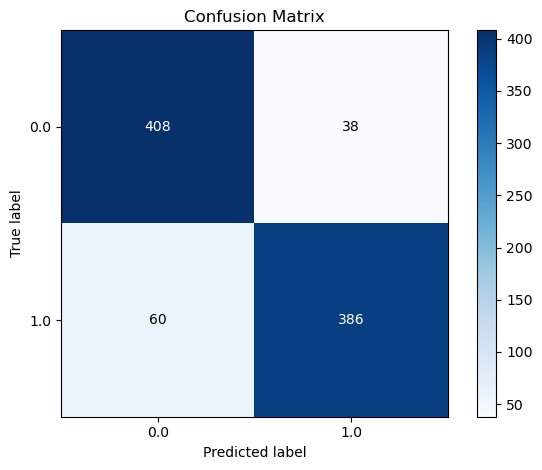

In [50]:
y_pred=best_grid_svc.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for SVM hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

[[94 33]
 [22 60]]
Accuracy Score 0.7368421052631579
Classification report: 
              precision    recall  f1-score   support

         0.0       0.81      0.74      0.77       127
         1.0       0.65      0.73      0.69        82

    accuracy                           0.74       209
   macro avg       0.73      0.74      0.73       209
weighted avg       0.75      0.74      0.74       209



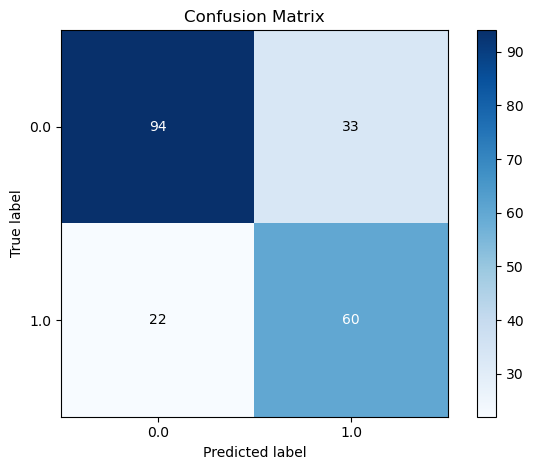

In [51]:

y_pred=best_grid_svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for SVC hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on Multinomial Naive Bayes

In [52]:
from  sklearn.naive_bayes import MultinomialNB

In [53]:
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
    'fit_prior': [True, False]
}

In [54]:
nb_grid = MultinomialNB()
grid_search_nb = GridSearchCV(estimator=nb_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_nb.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END criterion=log_loss, max_depth=10, max_features=None, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=None, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=None, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=None, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_feat

GridSearchCV(cv=10, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
                         'fit_prior': [True, False]},
             verbose=2)

In [55]:
best_grid_nb = grid_search_nb.best_estimator_
best_grid_nb

MultinomialNB()

In [56]:
# Applying the best grid for Multinomial Naive Bayes
best_grid_nb.fit(X_train, y_train)

MultinomialNB()

### Train Set

[[304 142]
 [178 268]]
Accuracy Score 0.6412556053811659
Classification report: 
              precision    recall  f1-score   support

         0.0       0.63      0.68      0.66       446
         1.0       0.65      0.60      0.63       446

    accuracy                           0.64       892
   macro avg       0.64      0.64      0.64       892
weighted avg       0.64      0.64      0.64       892



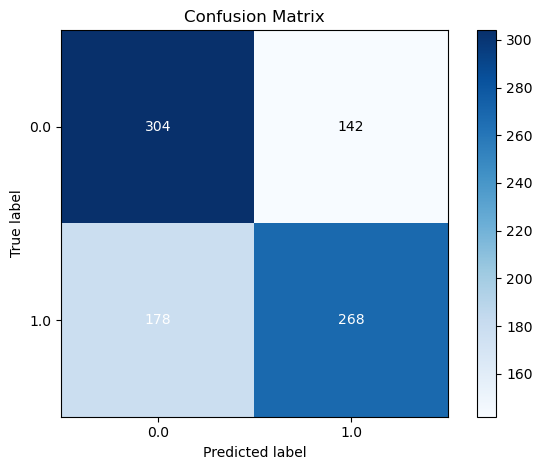

In [57]:
y_pred=best_grid_nb.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for Multinomial NB hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

[[78 49]
 [27 55]]
Accuracy Score 0.6363636363636364
Classification report: 
              precision    recall  f1-score   support

         0.0       0.74      0.61      0.67       127
         1.0       0.53      0.67      0.59        82

    accuracy                           0.64       209
   macro avg       0.64      0.64      0.63       209
weighted avg       0.66      0.64      0.64       209



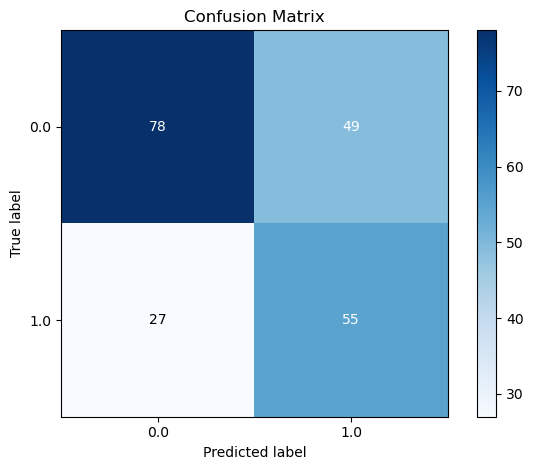

In [58]:
y_pred=best_grid_nb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for MultinomialNB hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Ensemble Learning

In [59]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Hard Voting classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [61]:
#log_clf = LogisticRegression(random_state=42)
#rnd_clf = RandomForestClassifier(random_state=42)
#svm_clf = SVC(random_state=42)
hard_voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', best_grid_dt),
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc),
        ('nb', best_grid_nb)
    ], 
    voting = 'hard'
)
hard_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=6)),
                             ('dt', DecisionTreeClassifier(max_depth=3)),
                             ('lr',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=30,
                                                     max_features=None)),
                             ('svc',
                              SVC(break_ties=True, kernel='poly',
                                  probability=True, random_state=42)),
                             ('nb', MultinomialNB())])

In [62]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr, best_grid_rf, best_grid_svc, best_grid_nb, hard_voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier 0.6985645933014354
DecisionTreeClassifier 0.7033492822966507
LogisticRegression 0.6985645933014354
RandomForestClassifier 0.8277511961722488
SVC 0.7368421052631579
MultinomialNB 0.6363636363636364
VotingClassifier 0.7655502392344498


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Train Set

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

Accuracy Score 0.8430493273542601
Classification report: 
              precision    recall  f1-score   support

         0.0       0.78      0.96      0.86       446
         1.0       0.94      0.73      0.82       446

    accuracy                           0.84       892
   macro avg       0.86      0.84      0.84       892
weighted avg       0.86      0.84      0.84       892



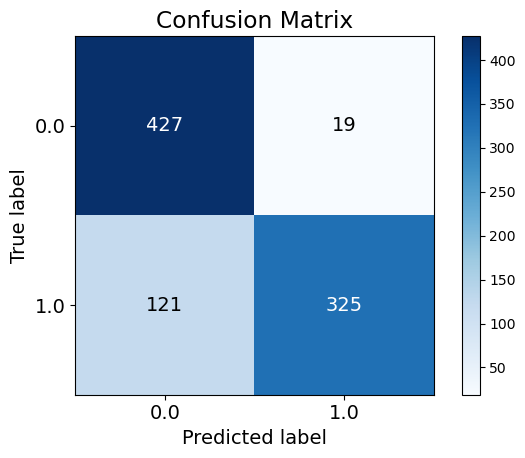

In [63]:
skplt.metrics.plot_confusion_matrix(y_train, hard_voting_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for Ensemble Hard Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_train, hard_voting_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, hard_voting_clf.predict(X_train))))

### Test Set

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy Score 0.7655502392344498
Classification report: 
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.82       127
         1.0       0.73      0.63      0.68        82

    accuracy                           0.77       209
   macro avg       0.76      0.74      0.75       209
weighted avg       0.76      0.77      0.76       209



/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

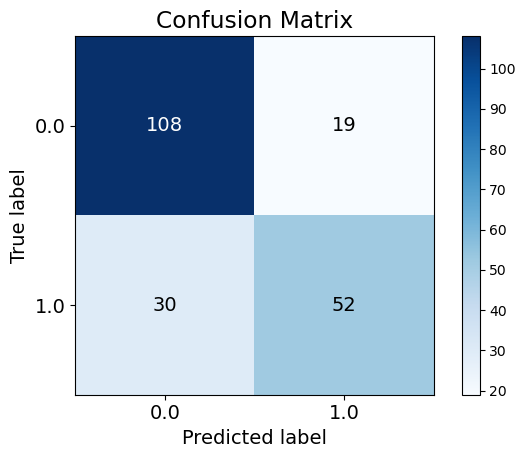

In [64]:
skplt.metrics.plot_confusion_matrix(y_test, hard_voting_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for Ensemble Hard Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_test, hard_voting_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, hard_voting_clf.predict(X_test))))

## Soft voting classifier

In [65]:
soft_voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', best_grid_dt),
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc),
        ('nb', best_grid_nb)
    ], 
    voting = 'soft'
)
soft_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=6)),
                             ('dt', DecisionTreeClassifier(max_depth=3)),
                             ('lr',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=30,
                                                     max_features=None)),
                             ('svc',
                              SVC(break_ties=True, kernel='poly',
                                  probability=True, random_state=42)),
                             ('nb', MultinomialNB())],
                 voting='soft')

In [66]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr, best_grid_rf, best_grid_svc, best_grid_nb, soft_voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier 0.6985645933014354
DecisionTreeClassifier 0.7033492822966507
LogisticRegression 0.6985645933014354
RandomForestClassifier 0.8133971291866029
SVC 0.7368421052631579
MultinomialNB 0.6363636363636364
VotingClassifier 0.7607655502392344


### Train Set

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy Score 0.8430493273542601
Classification report: 
              precision    recall  f1-score   support

         0.0       0.78      0.96      0.86       446
         1.0       0.94      0.73      0.82       446

    accuracy                           0.84       892
   macro avg       0.86      0.84      0.84       892
weighted avg       0.86      0.84      0.84       892



/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

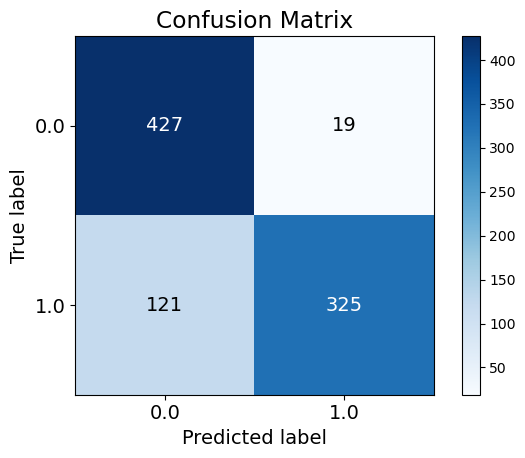

In [67]:
skplt.metrics.plot_confusion_matrix(y_train, hard_voting_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for Ensemble Soft Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_train, hard_voting_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, hard_voting_clf.predict(X_train))))

### Test Set

Accuracy Score 0.7607655502392344
Classification report: 
              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80       127
         1.0       0.69      0.72      0.70        82

    accuracy                           0.76       209
   macro avg       0.75      0.75      0.75       209
weighted avg       0.76      0.76      0.76       209



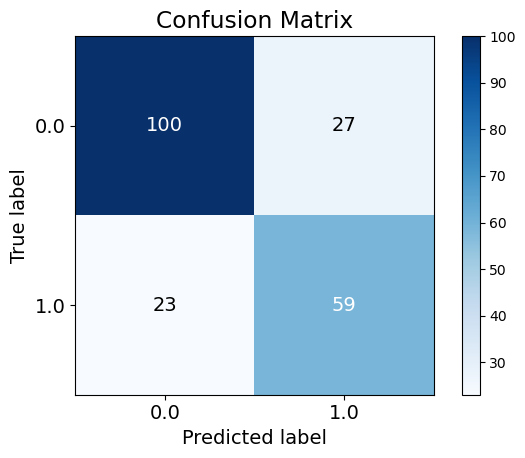

In [68]:
skplt.metrics.plot_confusion_matrix(y_test, soft_voting_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for Ensemble Soft Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_test, soft_voting_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, soft_voting_clf.predict(X_test))))

## bagging and pasting

In [69]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

## out of bag evaluation

In [70]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
print('OOB Score', bag_clf.oob_score_)

y_pred = bag_clf.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))
print('Train Accuracy', accuracy_score(y_train, bag_clf.predict(X_train)))

OOB Score 0.8150224215246636
Test Accuracy 0.8229665071770335
Train Accuracy 1.0


Accuracy Score 0.8229665071770335
Classification report: 
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       127
         1.0       0.78      0.76      0.77        82

    accuracy                           0.82       209
   macro avg       0.82      0.81      0.81       209
weighted avg       0.82      0.82      0.82       209



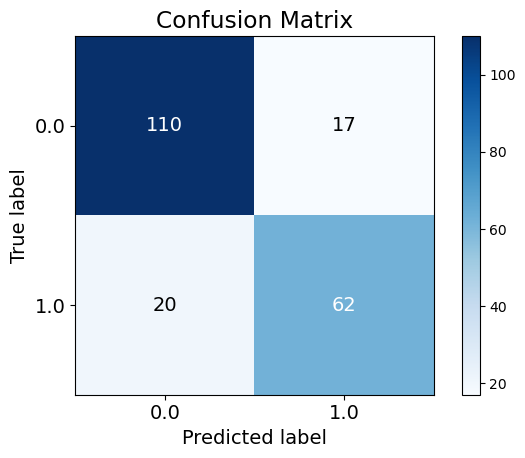

In [71]:
skplt.metrics.plot_confusion_matrix(y_test, bag_clf.predict(X_test));
save_fig('Confusion Matrix for Out of bag q3')
print("Accuracy Score {}".format(accuracy_score(y_test, bag_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, bag_clf.predict(X_test))))

Accuracy Score 1.0
Classification report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       446
         1.0       1.00      1.00      1.00       446

    accuracy                           1.00       892
   macro avg       1.00      1.00      1.00       892
weighted avg       1.00      1.00      1.00       892



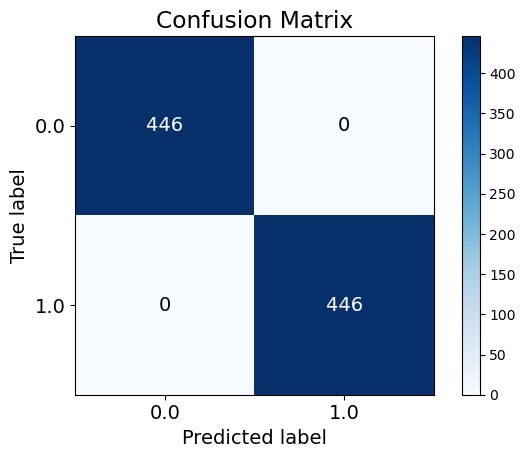

In [72]:
skplt.metrics.plot_confusion_matrix(y_train, bag_clf.predict(X_train));
save_fig('Confusion Matrix train for Out of bag q3')
print("Accuracy Score {}".format(accuracy_score(y_train, bag_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, bag_clf.predict(X_train))))

## impact of no. of estimators

In [73]:
import numpy as np
est = range(50, 500, 50)
train_acc = []
test_acc = []
oob_acc = []
estim = []
out = []
for num_est in est:
    estim.append(num_est)
    rnd_clf = RandomForestClassifier(n_estimators=num_est, oob_score = True, 
                                     max_leaf_nodes=16, n_jobs=-1, 
                                     random_state=42)
    rnd_clf.fit(X_train, y_train)
    y_pred_rf = rnd_clf.predict(X_test)
    train_acc.append(
        accuracy_score(y_train, rnd_clf.predict(X_train)))
    test_acc.append(
        accuracy_score(y_test, rnd_clf.predict(X_test)))
    oob_acc.append(rnd_clf.oob_score_)
i = 0
while i < len(estim):
    print('Num of estimators: ', estim[i], ' train acc = ', train_acc[i],
         ' test acc = ', test_acc[i], 'oob = ', oob_acc[i])
    i = i + 1

Num of estimators:  50  train acc =  0.7937219730941704  test acc =  0.7129186602870813 oob =  0.7141255605381166
Num of estimators:  100  train acc =  0.7982062780269058  test acc =  0.7129186602870813 oob =  0.7219730941704036
Num of estimators:  150  train acc =  0.8015695067264574  test acc =  0.7129186602870813 oob =  0.7163677130044843
Num of estimators:  200  train acc =  0.7993273542600897  test acc =  0.7129186602870813 oob =  0.7219730941704036
Num of estimators:  250  train acc =  0.8060538116591929  test acc =  0.7129186602870813 oob =  0.7208520179372198
Num of estimators:  300  train acc =  0.8038116591928252  test acc =  0.722488038277512 oob =  0.7230941704035875
Num of estimators:  350  train acc =  0.8060538116591929  test acc =  0.7272727272727273 oob =  0.7242152466367713
Num of estimators:  400  train acc =  0.8060538116591929  test acc =  0.7272727272727273 oob =  0.7197309417040358
Num of estimators:  450  train acc =  0.8060538116591929  test acc =  0.7272727272

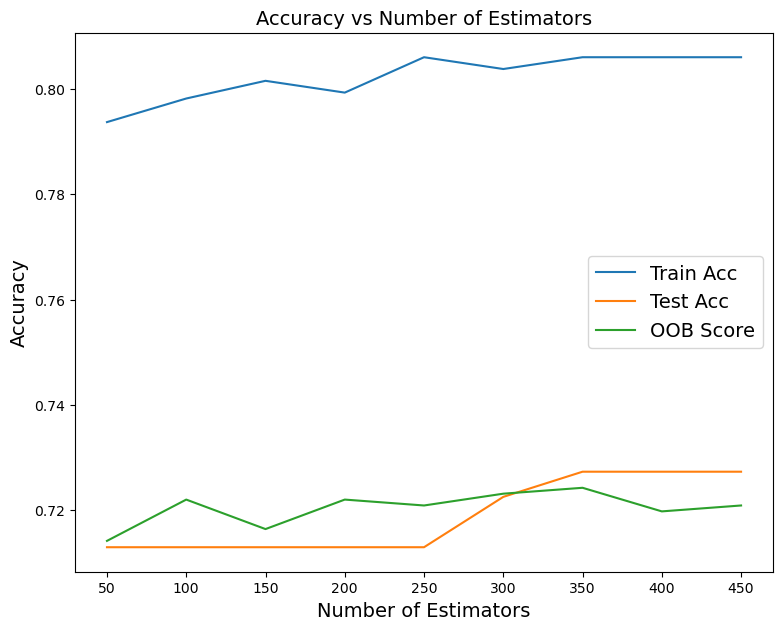

In [74]:
plt.figure(figsize = (9,7))
plt.plot(estim, train_acc, label = 'Train Acc')
plt.plot(estim, test_acc, label = 'Test Acc')
plt.plot(estim, oob_acc, label = 'OOB Score')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## ADA boost classifier

In [75]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7033492822966507

### Train Set

Accuracy Score 0.7623318385650224
Classification report: 
              precision    recall  f1-score   support

         0.0       0.75      0.78      0.77       446
         1.0       0.77      0.74      0.76       446

    accuracy                           0.76       892
   macro avg       0.76      0.76      0.76       892
weighted avg       0.76      0.76      0.76       892



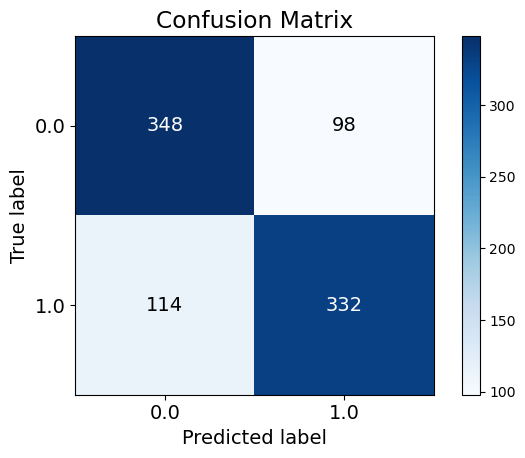

In [76]:
skplt.metrics.plot_confusion_matrix(y_train, ada_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for AdaBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_train, ada_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, ada_clf.predict(X_train))))

In [77]:
### Test Set

Accuracy Score 0.7033492822966507
Classification report: 
              precision    recall  f1-score   support

         0.0       0.81      0.67      0.73       127
         1.0       0.60      0.76      0.67        82

    accuracy                           0.70       209
   macro avg       0.70      0.71      0.70       209
weighted avg       0.73      0.70      0.71       209



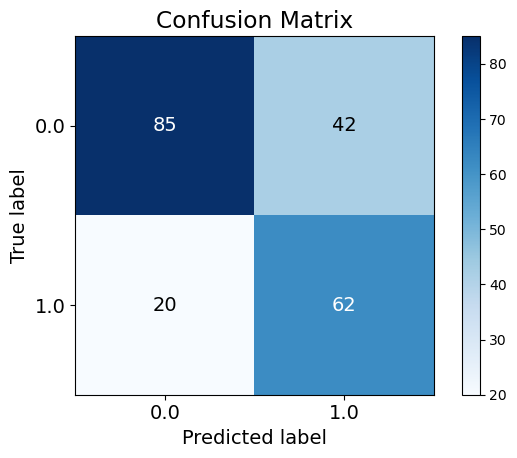

In [78]:
skplt.metrics.plot_confusion_matrix(y_test, ada_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for AdaBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_test, ada_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, ada_clf.predict(X_test))))

In [79]:
import numpy as np
est = np.linspace(1, 500, 2)
train_acc = []
test_acc = []
num_learners = []
for estimators in est:
    ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=int(estimators),
    learning_rate=0.5, random_state=42)
    ada_clf.fit(X_train, y_train)
    y_pred_test = ada_clf.predict(X_test)
    y_pred_train = ada_clf.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))
    num_learners.append(estimators)

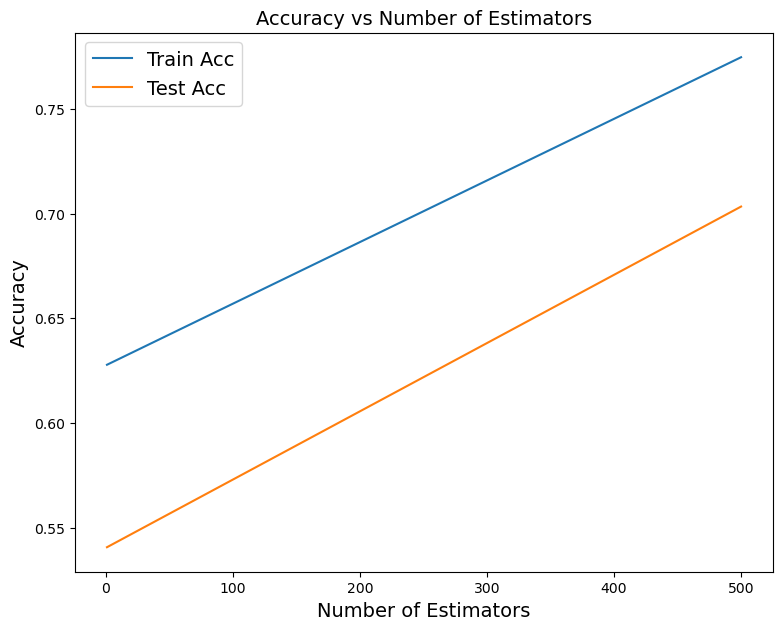

In [80]:
plt.figure(figsize = (9,7))
plt.plot(num_learners, train_acc, label = 'Train Acc')
plt.plot(num_learners, test_acc, label = 'Test Acc')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## XGBoost

In [81]:
import xgboost as xgb

In [82]:
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.8229665071770335

### Train Set

Accuracy Score 1.0
Classification report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       446
         1.0       1.00      1.00      1.00       446

    accuracy                           1.00       892
   macro avg       1.00      1.00      1.00       892
weighted avg       1.00      1.00      1.00       892



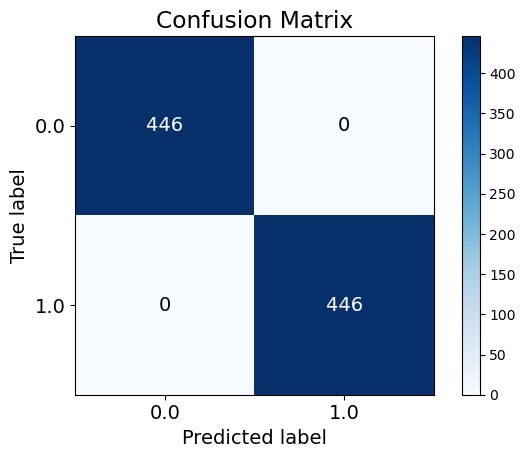

In [83]:
skplt.metrics.plot_confusion_matrix(y_train, xgb_cl.predict(X_train));
save_fig('Train Set Confusion Matrix for XGBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_train, xgb_cl.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, xgb_cl.predict(X_train))))

### Test Set

Accuracy Score 0.8229665071770335
Classification report: 
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85       127
         1.0       0.77      0.78      0.78        82

    accuracy                           0.82       209
   macro avg       0.81      0.82      0.81       209
weighted avg       0.82      0.82      0.82       209



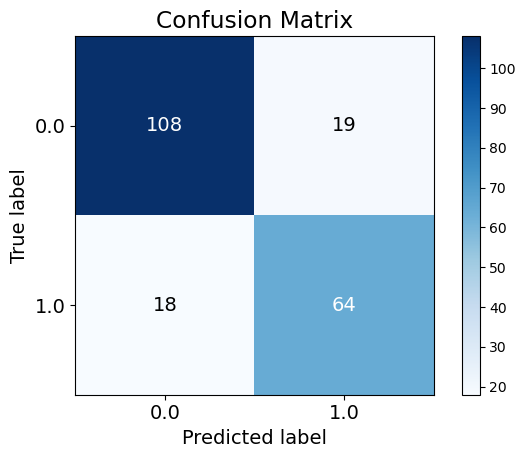

In [84]:
skplt.metrics.plot_confusion_matrix(y_test, xgb_cl.predict(X_test));
save_fig('Test Set Confusion Matrix for XGBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_test, xgb_cl.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, xgb_cl.predict(X_test))))

## XAI using LIME

In [85]:
#conda install -c conda-forge ds-lime

In [86]:
from lime.lime_tabular import LimeTabularExplainer

In [87]:
feature_names = X_train.columns.tolist()
#X_train.columns.values.tolist()

In [88]:
# Create a LimeTabularExplainer object
explainer = LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=['low', 'high'])


In [89]:
# Select a specific instance from the testing set for explanation
instance_idx = 0
instance = X_test.values[instance_idx]
true_label = y_test[instance_idx]

In [90]:
# Generate explanations using LIME
#Since our accuracy is the highest for Out of Bag, we will be using OOB to interpret
explanation_lime = explainer.explain_instance(instance, best_grid_rf.predict_proba, num_features=len(feature_names))


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [91]:
# Print the true label and predicted probabilities
print("True Label:", true_label)
print("Predicted Probabilities:", best_grid_rf.predict_proba([instance]))



True Label: 1.0
Predicted Probabilities: [[0.64 0.36]]


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [92]:
# Print the top features and their weights in the LIME explanation
print("LIME Explanation:")
for feature, weight in explanation_lime.as_list():
    print(feature, weight)

LIME Explanation:
goout <= 0.25 -0.24205701064901539
famrel <= 0.66 0.09678977058751238
sex_M <= 0.00 -0.09482099468856478
0.00 < sex_F <= 1.00 -0.07575625528700165
Fjob_health <= 0.00 0.052130983115201895
0.00 < Fjob_services <= 1.00 0.03273235805080329
Mjob_services > 0.00 0.02496526920543348
Medu <= 0.50 -0.02399682625298245
0.14 < age <= 0.29 0.022277382633368602
studytime > 0.33 -0.021409541463544856
Fjob_teacher <= 0.00 0.020261518754010936
failures <= 0.00 -0.01689462612600579
Pstatus_A <= 0.00 0.016079664518331923
Mjob_other <= 0.00 0.0158187203055402
guardian_father <= 0.00 -0.015630849278479915
0.50 < health <= 0.75 -0.014120845271538042
paid_yes > 0.00 0.013882931129759891
Mjob_teacher <= 0.00 -0.012746079698322494
famsup_no <= 0.00 -0.011808001830958212
0.00 < guardian_mother <= 1.00 -0.011775676846966033
0.00 < famsize_LE3 <= 1.00 0.011564349146632865
Mjob_at_home <= 0.00 0.010564291427156695
schoolsup_yes <= 0.00 0.010435995955934585
guardian_other <= 0.00 0.0103011305924

### Feature Importance Plot

In [93]:
feature_importance = explanation_lime.as_list()


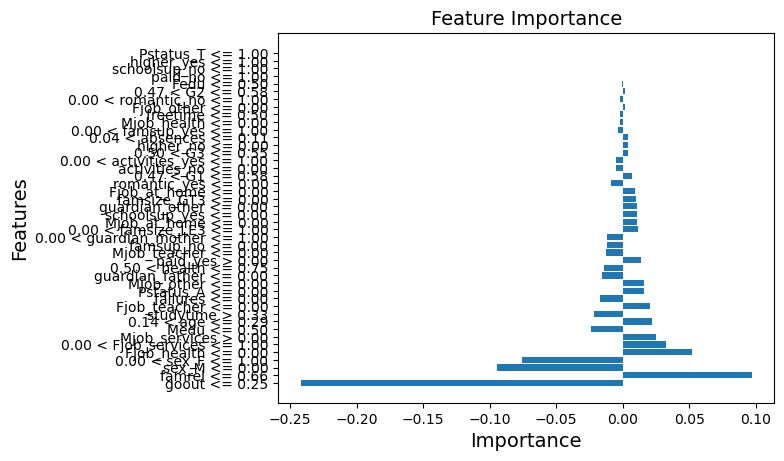

In [94]:
import matplotlib.pyplot as plt

features, values = zip(*feature_importance)
plt.barh(features, values)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.savefig('images/question 3/LIME Feature Importance q3.png')
plt.show()

### LIME Explanation Plot

In [95]:
feature_contributions = explanation_lime.local_exp[1]

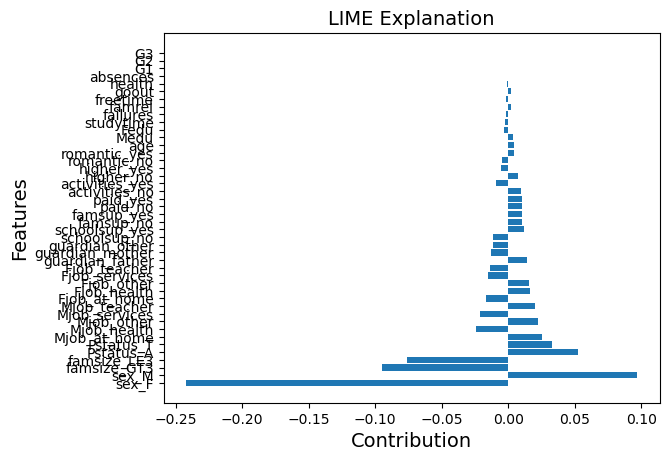

In [96]:
import matplotlib.pyplot as plt

features, contributions = zip(*feature_contributions)
plt.barh(feature_names, contributions)
plt.xlabel('Contribution')
plt.ylabel('Features')
plt.title('LIME Explanation')
plt.savefig('images/question 3/LIME Explanation Graph q3.png')
plt.show()

## Explanation for class 1

In [97]:
import matplotlib.pyplot as plt
print('Predicted: ',best_grid_rf.predict(X_test)[0])
print('Actual: ', y_test[0])
explanation_lime.show_in_notebook(show_table=True, show_all=False)
explanation_lime.save_to_file('images/question 3/LIME Prediction Probability for class 1 q3.html')

Predicted:  0.0
Actual:  1.0


### Explanation for class 0

In [98]:
#Perform the explanation on the 8th instance in the test data
explaination = explainer.explain_instance(X_test.iloc[8], best_grid_rf.predict_proba)

# show the result of the model's explaination
print('Predicted: ',best_grid_rf.predict(X_test)[8])
print('Actual: ', y_test[8])
explaination.show_in_notebook(show_table = True, show_all = False,)
explaination.save_to_file('images/question 3/LIME Prediction Probability for class 0 q3.html')


Predicted:  0.0
Actual:  0.0


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.07023e-43): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [99]:
pd.DataFrame({'y_test': y_test, 'y_pred': best_grid_rf.predict(X_test)}).head(10)

y_test  y_pred
0     1.0     0.0
1     1.0     1.0
2     1.0     1.0
3     1.0     1.0
4     0.0     0.0
5     0.0     1.0
6     0.0     0.0
7     1.0     1.0
8     0.0     0.0
9     0.0     0.0

# SHAP

In [100]:
import shap
import matplotlib.pyplot as plt

#model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500, n_jobs=-1, oob_score=True, random_state=42)
#model.fit(X_train,y_train)

# Create a SHAP explainer
#explainer = shap.KernelExplainer(model.predict_proba,X_train)  # Replace "model" with your trained model
explainer = shap.Explainer(best_grid_rf)

# Calculate SHAP values for the entire dataset
shap_values = explainer.shap_values(X_train)  # Replace "X" with your input data

# Select the desired instance for explanation (index 0 in this example)
instance = X_train.iloc[0]  # Replace "X" with your input data

# Calculate the SHAP values for the selected instance
shap_values_instance = explainer.shap_values(instance)

# Plot the SHAP summary plot
#shap.summary_plot(shap_values, X_train)  # Replace "X" with your input data

# Plot the SHAP values for the selected instance
#shap.force_plot(explainer.expected_value, shap_values[0])

# Save the figures
#plt.savefig('images/shap_summary_plot.png', dpi=300)
#shap.save_html('images/shap_force_plot.html', shap.force_plot(explainer.expected_value, shap_values_instance, instance))

# Show the plots
#plt.show()


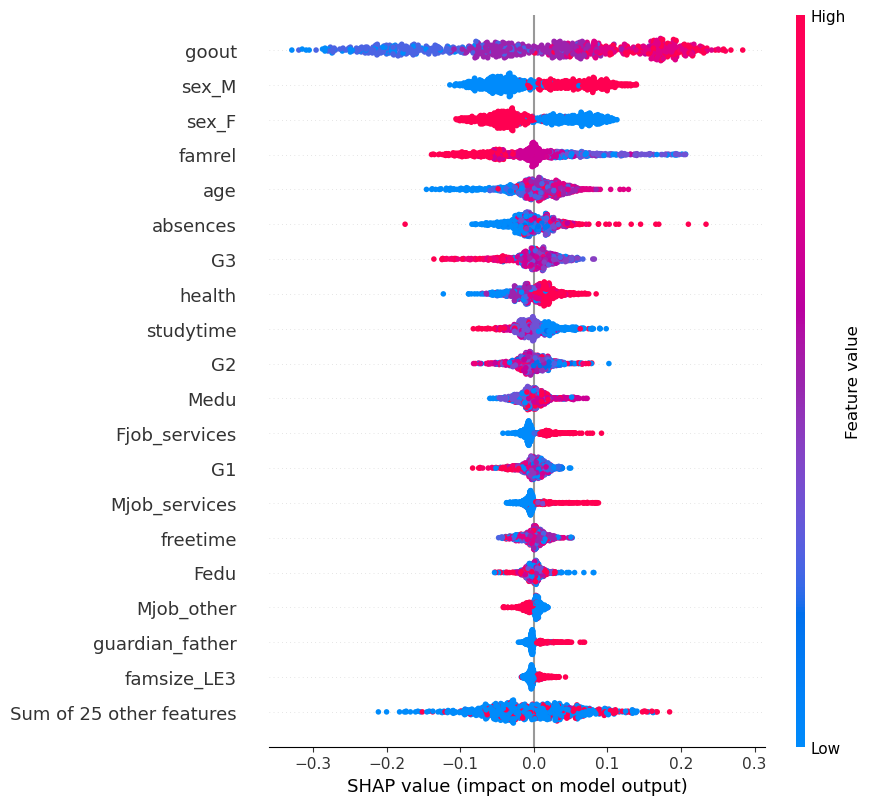

<Figure size 640x480 with 0 Axes>

In [101]:
from shap.plots import beeswarm
beeswarm(explainer(X_train)[:,:,1],max_display=20)
plt.savefig('images/question 3/beeswarm_plot.png',dpi=300, bbox_inches= 'tight')

In [102]:
pd.concat([X_test.loc[[190]],y_test.loc[[190]]], axis=1)

sex_F  sex_M  famsize_GT3  famsize_LE3  Pstatus_A  Pstatus_T  \
190    1.0    0.0          1.0          0.0        0.0        1.0   

     Mjob_at_home  Mjob_health  Mjob_other  Mjob_services  ...  failures  \
190           0.0          0.0         1.0            0.0  ...       0.0   

     famrel  freetime  goout  health  absences        G1        G2    G3  alc  
190     0.5       0.5   0.75     1.0  0.035714  0.684211  0.578947  0.55  1.0  

[1 rows x 45 columns]

In [103]:
# Calculate Shap values
choosen_instance = X_test.loc[[190]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

[CV] END break_ties=False, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=False, gamma=scale, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=False, gamma=scale, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=False, gamma=scale, kernel=linear, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=False, gamma=scale, kernel=linear, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=False, gamma=scale, kernel=poly, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=False, gamma=scale, kernel=poly, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=False, gamma=scale, kernel=poly, probability=True, random_state=None, shrinking=False; tot

[CV] END break_ties=True, gamma=auto, kernel=rbf, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, gamma=auto, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, gamma=auto, kernel=sigmoid, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END br

[CV] END break_ties=True, gamma=auto, kernel=sigmoid, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, gamma=auto, kernel=sigmoid, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, gamma=auto, kernel=sigmoid, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=sigmoid, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=False, gamma=scale, kernel=linear, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=False, gamma=scale, kernel=linear, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=False, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=False, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=True; total

[CV] END .........penalty=l1, random_state=None, solver=saga; total time=   0.0s
[CV] END .........penalty=l1, random_state=None, solver=saga; total time=   0.0s
[CV] END ....penalty=l2, random_state=None, solver=newton-cg; total time=   0.0s
[CV] END ....penalty=l2, random_state=None, solver=newton-cg; total time=   0.0s
[CV] END penalty=l2, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l2, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l2, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l2, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l2, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l2, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END .........penalty=l2, random_state=None, solver=saga; total time=   0.0s
[CV] END .........penalty=l2, random_state=None, solver=saga; total time=   0.0s
[CV] END .......

[CV] END break_ties=True, gamma=scale, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, gamma=scale, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=scale, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=scale, kernel=rbf, probability=True, random_state=42, shrinking=True; total time=   0.4s
[CV] END break_ties=True, gamma=scale, kernel=rbf, probability=True, random_state=42, shrinking=True; total time=   0.4s
[CV] END break_ties=True, gamma=scale, kernel=rbf, probability=True, random_state=None, shrinking=True; total time=   0.4s
[CV] END break_ties=True, gamma=scale, kernel=rbf, probability=True, random_state=None, shrinking=True; total time=   0.4s
[CV] END break_ties=True, gamma=scale, kernel=rbf, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END brea